<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Open_Street_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Open Street Map (OSM)**

## Preparations

In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import osmnx as ox

## Kick-off

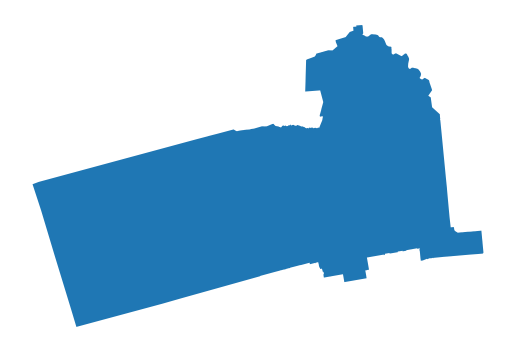

In [ ]:
city = ox.geocode_to_gdf('Berkeley, California')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

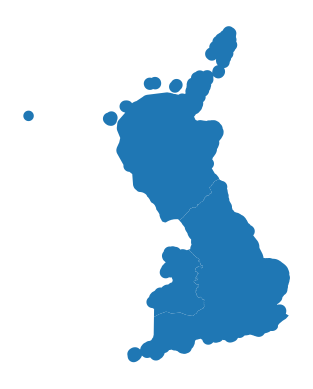

In [ ]:
places = ox.geocode_to_gdf(['England', 'Wales', 'Scotland'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

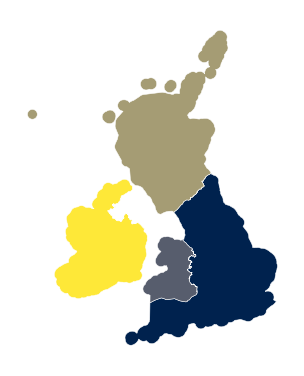

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# Get the geographical data
places = ox.geocode_to_gdf(['England', 'Wales', 'Scotland', 'ireland'])

# Project the GeoDataFrame to UTM (i.e., meters)
places = ox.project_gdf(places)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)

# Create a dummy column for coloring
places['dummy'] = range(len(places))

# Plot the data with the 'Blues' coluormap
places.plot(ax=ax, column='dummy', cmap='cividis', edgecolor='white', linewidth=0.25)

# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()


## Visualise Road Networks

<ipython-input-22-99ea31c8744b>:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='all')


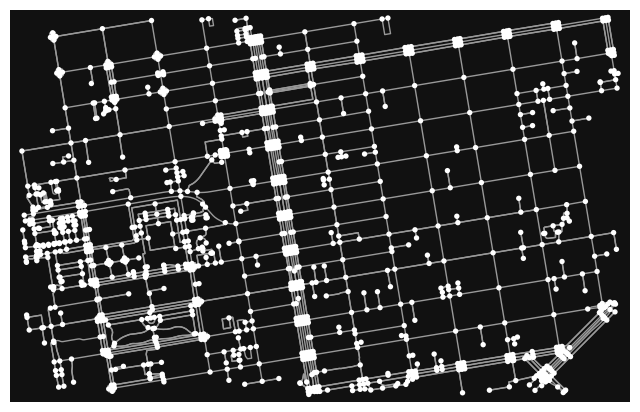

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='all')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

<ipython-input-7-b011c3a746ea>:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')


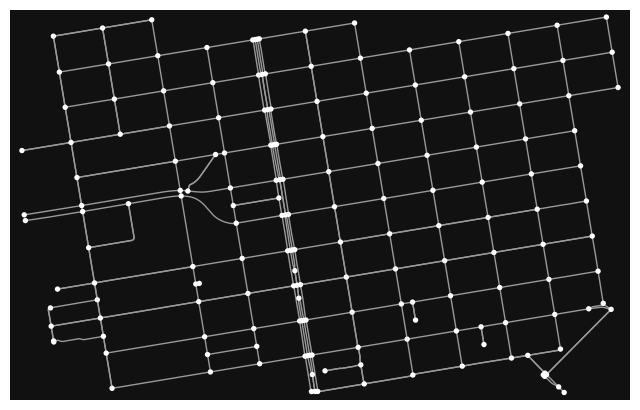

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

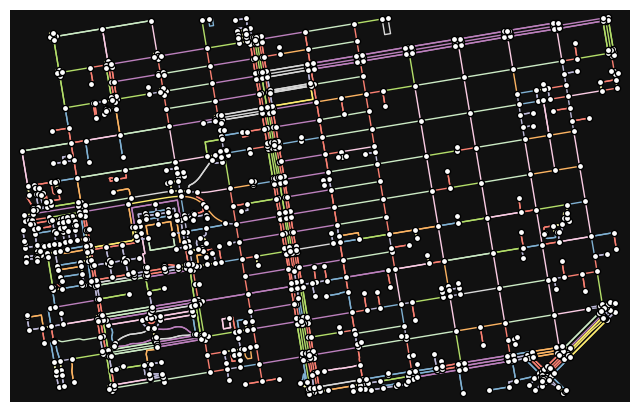

In [38]:
# Generate the graph from bounding box
G = ox.graph_from_bbox(bbox=(37.78, 37.79, -122.43, -122.41), network_type='all')

# Project the graph
G_projected = ox.project_graph(G)

# Get the connected components of the graph
connected_components = list(nx.strongly_connected_components(G_projected))

# Define edge colors based on edge length
edge_lengths = [data['length'] for _, _, data in G_projected.edges(data=True)]
norm = plt.Normalize(vmin=min(edge_lengths), vmax=max(edge_lengths))
cmap = plt.cm.ScalarMappable(norm=norm, cmap='Set3')
edge_colors = [cmap.to_rgba(len) for len in edge_lengths]

# Plot the graph
fig, ax = ox.plot_graph(G_projected, node_color='w', node_edgecolor='k', node_size=20, node_zorder=3, edge_color=edge_colors, edge_linewidth=1)


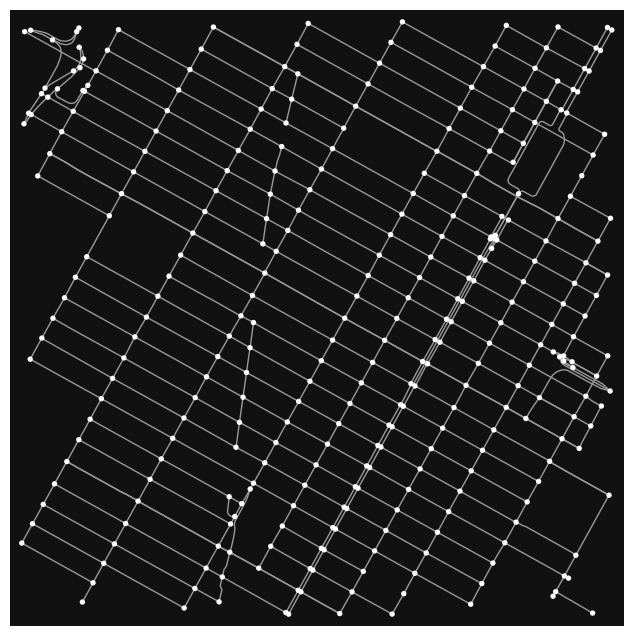

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

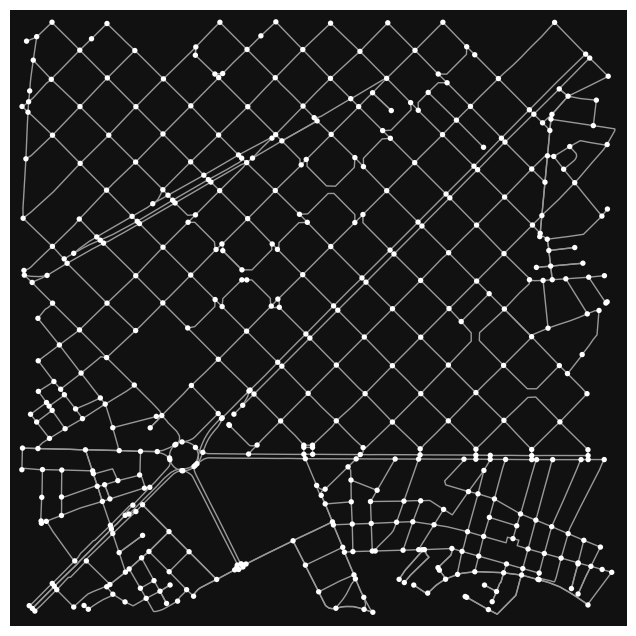

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [21]:
G2_graph = ox.graph_from_address('Rocafort, Barcelona', network_type='drive')
ox.plot_graph(G)

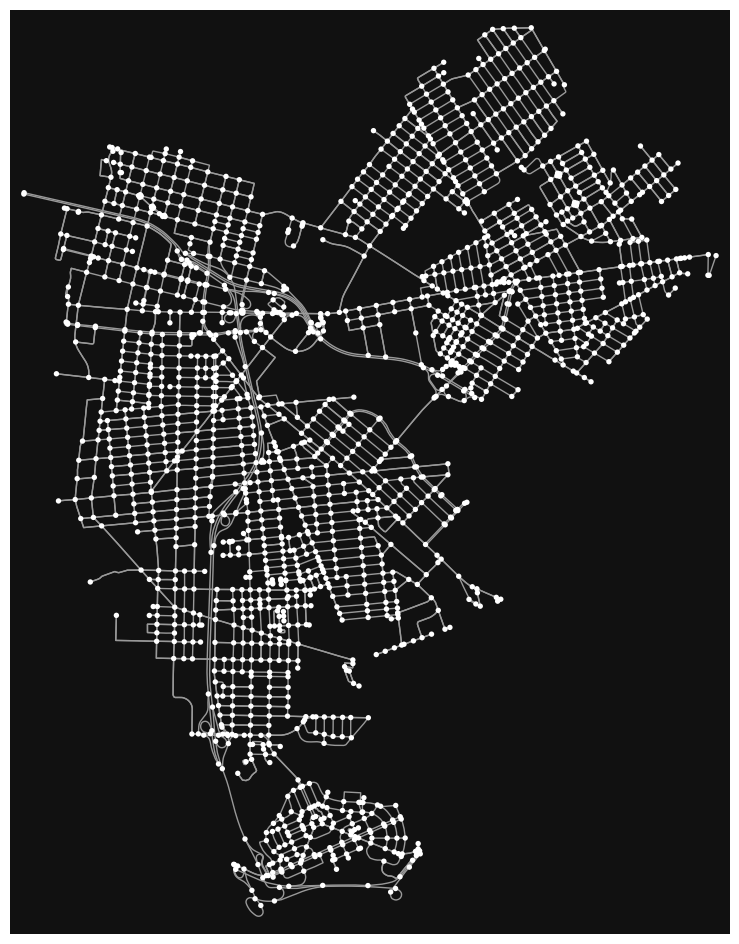

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Camden', network_type='drive')
ox.plot_graph(G, figsize=(12, 12), dpi=150)

<ipython-input-47-b04ab8655608>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries.geometries_from_point(center_point=(51.5517, -0.1395), tags=tags)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (De

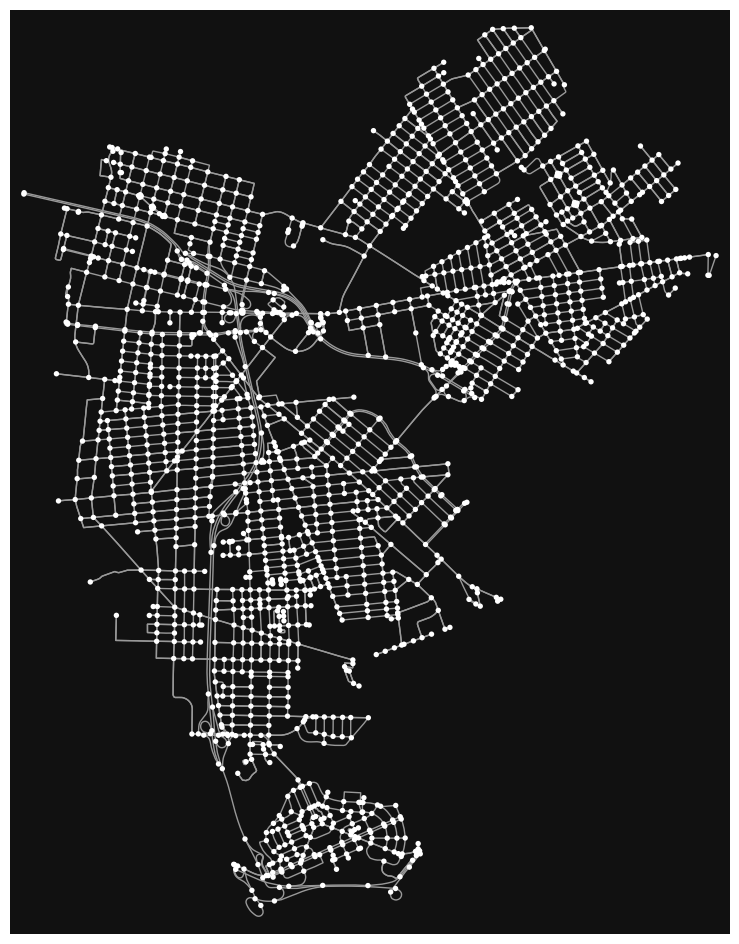

In [47]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Set query tags
tags = {'amenity': ['restaurant', 'pub', 'hotel'], 'building': 'hotel', 'tourism': 'hotel'}

# Get points of interest information
gdf = ox.geometries.geometries_from_point(center_point=(51.5517, -0.1395), tags=tags)

# Filter out point geometry objects
gdf_points = gdf[gdf.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('Camden', network_type='drive')

# Plot network graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, show=False, close=False)

# Mark points of interest on the map with red dots
ax.scatter(gdf_points.geometry.x, gdf_points.geometry.y, c='red')

plt.show()


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please

Node ID: 103324141, Latitude: 39.9469387, Longitude: -75.0699075
Node ID: 103324145, Latitude: 39.945362, Longitude: -75.071765
Node ID: 103324151, Latitude: 39.94357, Longitude: -75.073837
Node ID: 103324152, Latitude: 39.9429691, Longitude: -75.0745642
Node ID: 103324154, Latitude: 39.9426687, Longitude: -75.0749271
Node ID: 103324155, Latitude: 39.94254, Longitude: -75.075079
Node ID: 103324156, Latitude: 39.94216, Longitude: -75.075515
Node ID: 103324158, Latitude: 39.941631, Longitude: -75.076121
Node ID: 103324160, Latitude: 39.9411083, Longitude: -75.0767373
Node ID: 103324162, Latitude: 39.940399, Longitude: -75.077556
Node ID: 103324166, Latitude: 39.9389038, Longitude: -75.0792951
Node ID: 103324692, Latitude: 39.9445226, Longitude: -75.121409
Node ID: 103324694, Latitude: 39.9456581, Longitude: -75.1210987
Node ID: 103324704, Latitude: 39.9479532, Longitude: -75.120405
Node ID: 103324726, Latitude: 39.9509693, Longitude: -75.1194515
Node ID: 103324729, Latitude: 39.9519805, 

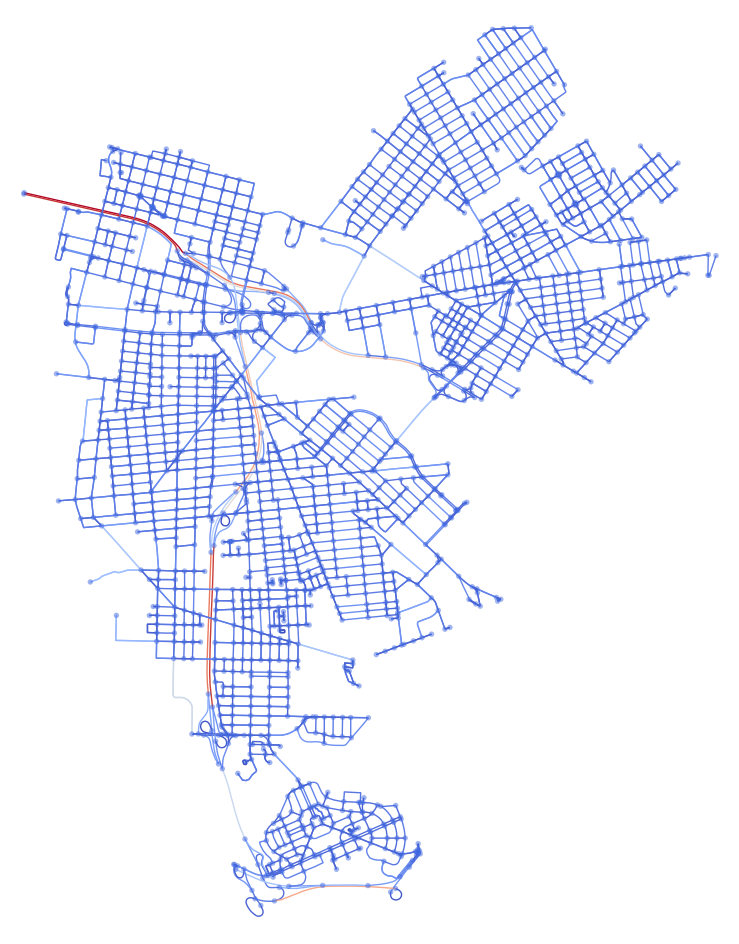

In [48]:
import networkx as nx
import osmnx as ox
import geopy.distance

# Get the street network
G = ox.graph_from_place('Camden', network_type='drive')

# Calculate the length of each edge
edge_lengths = {}
for u, v, data in G.edges(data=True):
    coord_u = G.nodes[u]['y'], G.nodes[u]['x']
    coord_v = G.nodes[v]['y'], G.nodes[v]['x']
    edge_lengths[(u, v)] = geopy.distance.distance(coord_u, coord_v).m

# Create a colour mapping
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=min(edge_lengths.values()), vmax=max(edge_lengths.values()))
ec = [cmap(norm(edge_lengths[edge])) if edge in edge_lengths else 'gray' for edge in G.edges()]

# Print all node positions
for node, data in G.nodes(data=True):
    print(f"Node ID: {node}, Latitude: {data['y']}, Longitude: {data['x']}")

# Plot the image
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, edge_color=ec, node_color='royalblue', bgcolor='white', node_size=15, node_alpha=0.5)


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

Node ID: 103327730, Latitude: 39.9002532, Longitude: -75.1100288
Node ID: 103331609, Latitude: 39.9012631, Longitude: -75.1095483
Node ID: 651180540, Latitude: 39.901975, Longitude: -75.1111631
Node ID: 103330408, Latitude: 39.902962, Longitude: -75.111629
Node ID: 103330462, Latitude: 39.904865, Longitude: -75.11289
Node ID: 103333419, Latitude: 39.910099, Longitude: -75.11509
Node ID: 103333430, Latitude: 39.9119693, Longitude: -75.1145002
Node ID: 103333440, Latitude: 39.9125696, Longitude: -75.1145569
Node ID: 5647882234, Latitude: 39.9126665, Longitude: -75.1146112
Node ID: 103339822, Latitude: 39.9126748, Longitude: -75.1150302
Node ID: 103335214, Latitude: 39.9126988, Longitude: -75.1162443
Node ID: 103327295, Latitude: 39.9126906, Longitude: -75.1174192
Node ID: 103379188, Latitude: 39.9126809, Longitude: -75.1180437
Node ID: 103465842, Latitude: 39.9183028, Longitude: -75.1198136
Node ID: 103366932, Latitude: 39.919564, Longitude: -75.1197539
Node ID: 103366933, Latitude: 39.9

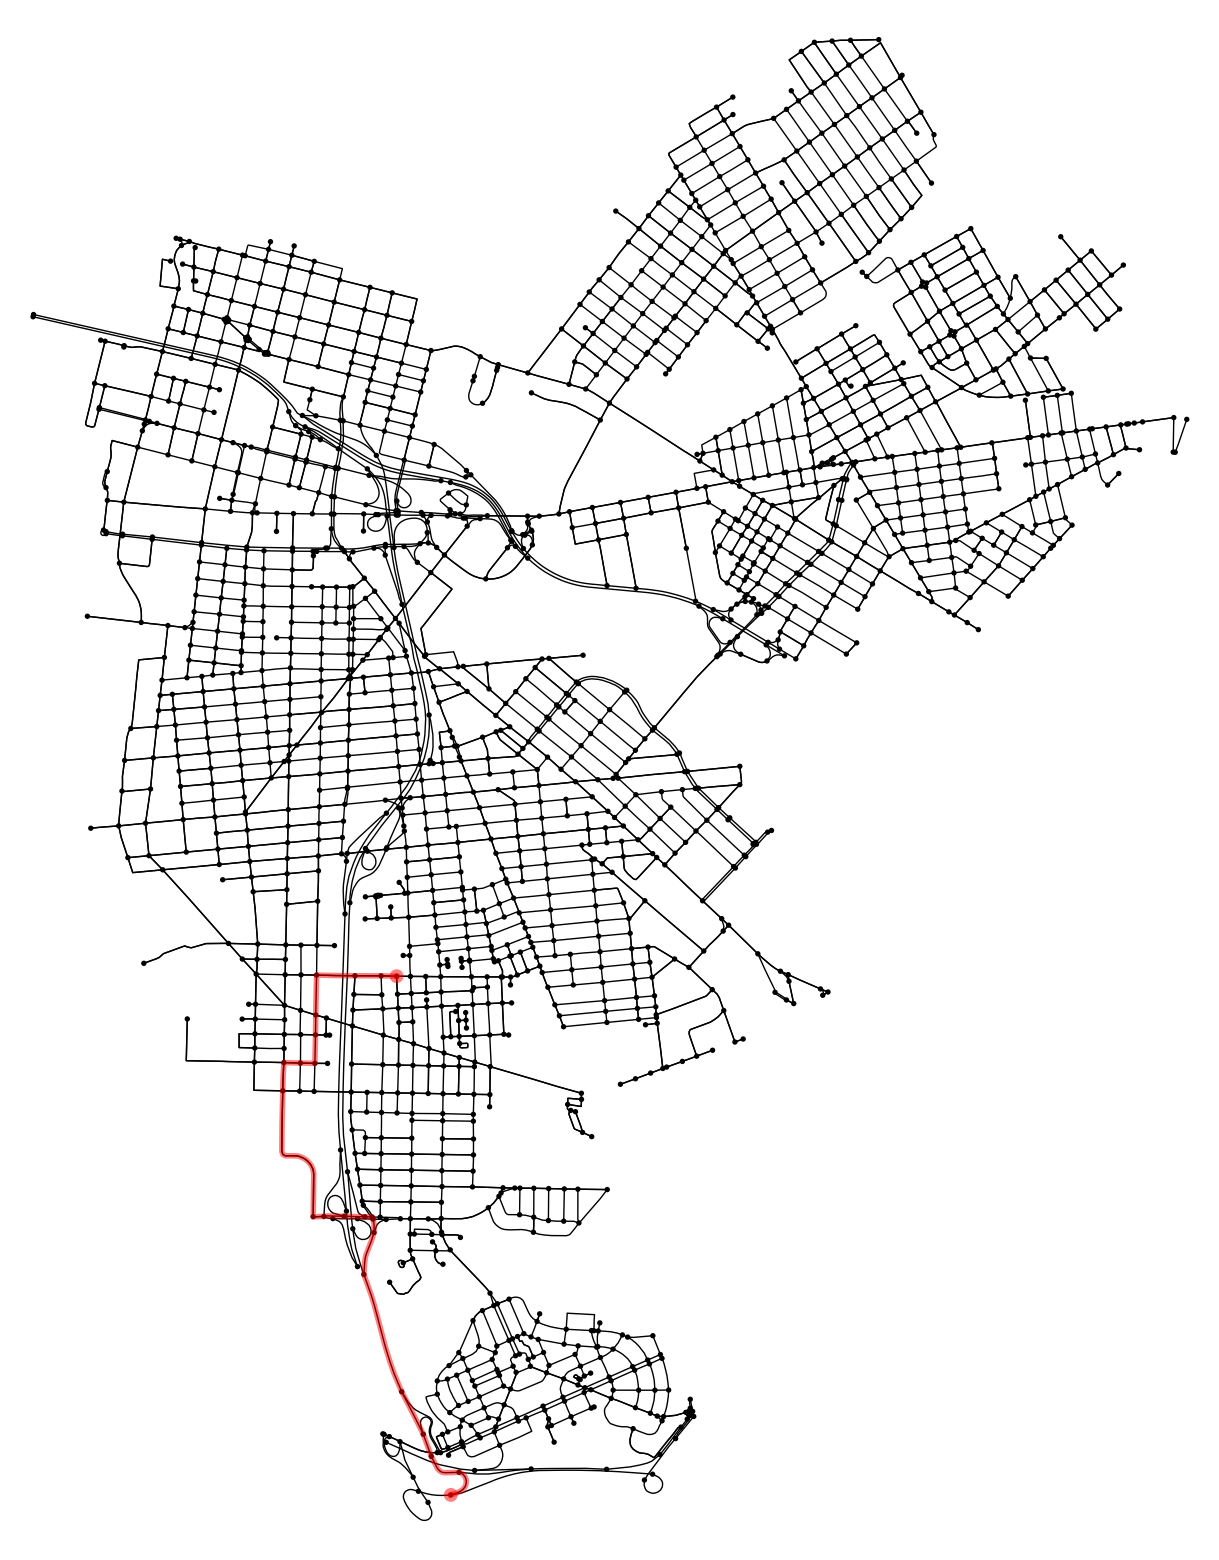

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [49]:
import networkx as nx
import random

# Download and model the street network
G = ox.graph_from_place('Camden', network_type='drive')

# Randomly select two nodes
nodes = list(G.nodes)
origin = random.choice(nodes)
destination = random.choice(nodes)

# Calculate the shortest path
route = nx.shortest_path(G, origin, destination)

# Print the geographical coordinates of all nodes passed
for node in route:
    print(f"Node ID: {node}, Latitude: {G.nodes[node]['y']}, Longitude: {G.nodes[node]['x']}")

# Visualise the shortest path
ox.plot_graph_route(G, route, figsize=(20, 20), dpi=150, edge_color='black', node_color='black', bgcolor='white')


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

POI ID: ('node', 357748641), Latitude: 39.9231, Longitude: -75.1187
amenity: school
ele: 5
gnis:county_id: 007
gnis:created: 08/23/2007
gnis:feature_id: 2340368
gnis:state_id: 34
name: Mickle Elementary School
addr:city: nan
addr:housenumber: nan
addr:postcode: nan
addr:state: nan
addr:street: nan
nodes: nan
building: nan
social_facility: nan
name_1: nan
website: nan


POI ID: ('node', 357749309), Latitude: 39.9231433, Longitude: -75.1183549
amenity: school
ele: 5
gnis:county_id: 007
gnis:created: 01/22/2008
gnis:feature_id: 2372471
gnis:state_id: 34
name: Creative Arts High School
addr:city: nan
addr:housenumber: nan
addr:postcode: nan
addr:state: nan
addr:street: nan
nodes: nan
building: nan
social_facility: nan
name_1: nan
website: nan


POI ID: ('node', 5646633786), Latitude: 39.9045867, Longitude: -75.1120566
amenity: kindergarten
ele: nan
gnis:county_id: nan
gnis:created: nan
gnis:feature_id: nan
gnis:state_id: nan
name: Fairivew Village Preschool
addr:city: Camden
addr:housenumb

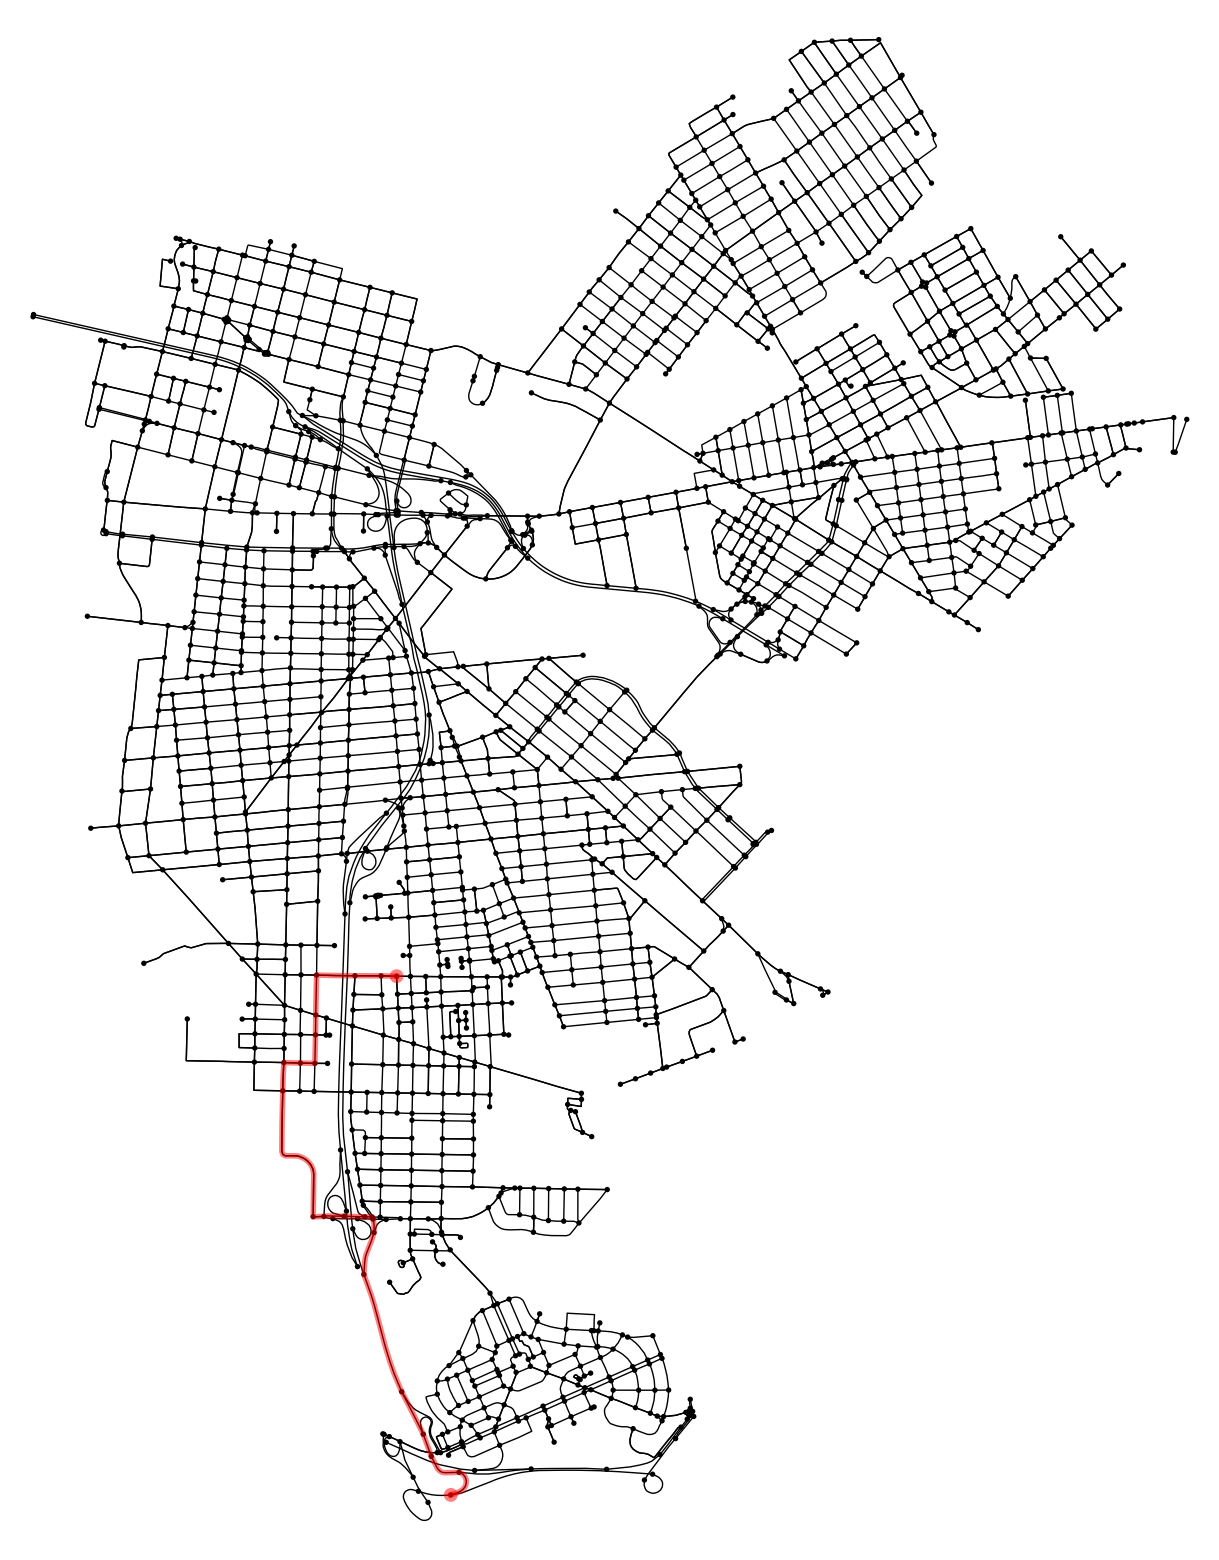

<Axes: >

<Figure size 640x480 with 0 Axes>

In [50]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Get geographical data
G = ox.graph_from_place('Camden', network_type='drive')

# Calculate the shortest path
route = nx.shortest_path(G, origin, destination)

# Create a LineString from the shortest path
line = LineString([Point((G.nodes[node]['x'], G.nodes[node]['y'])) for node in route])

# Create a buffer around the line (e.g., within 0.001 degrees)
buffer = line.buffer(0.001)

# Get all POIs within the buffer
tags = {'amenity': True}
pois = ox.features_from_polygon(buffer, tags=tags)

# Iterate through the rows of the GeoDataFrame
for idx, poi in pois.iterrows():
    # Get the centroid coordinates
    centroid = poi['geometry'].centroid
    print(f"POI ID: {idx}, Latitude: {centroid.y}, Longitude: {centroid.x}")

    # Print the content of the POI
    for key, value in poi.items():
        if key != 'geometry':
            print(f"{key}: {value}")
    print("\n")

# Plot the shortest path and POI
fig, ax = ox.plot_graph_route(G, route, figsize=(20, 20), dpi=150, edge_color='black', node_color='black', bgcolor='white')

# Plot the POI using the GeoDataFrame.plot function
gpd.GeoSeries(pois['geometry']).plot(ax=ax, color='red', markersize=50)


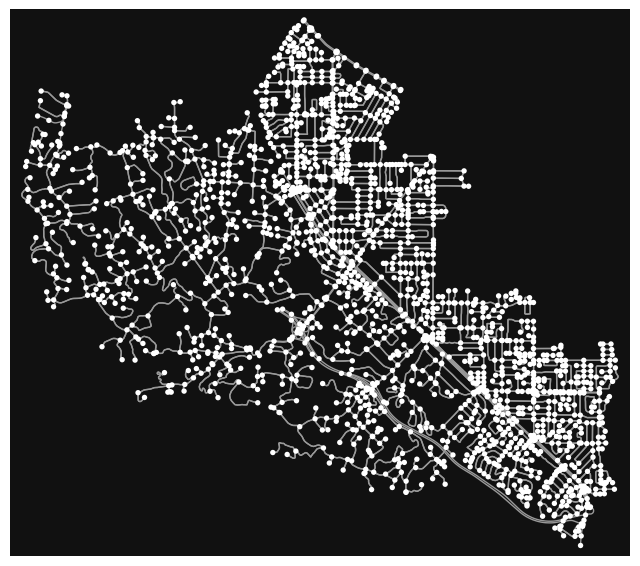

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

## GeoDataFrames

In [ ]:
G = ox.project_graph(ox.graph_from_place('San Francisco, California, USA', network_type='drive'))
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# get everything tagged amenity,
# and everything with landuse = retail or commercial,
# and everything with highway = bus_stop
tags = {'amenity' : True,
        'landuse' : ['retail', 'commercial'],
        'highway' : 'bus_stop'}

# Get the geographical data
gdf = ox.features_from_place('Piedmont, CA, USA', tags)

# Print the shape of the GeoDataFrame
print(gdf.shape)

(154, 72)


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([va

(26, 49)
                         amenity  \
element_type osmid                 
node         294758605    school   
             294758628    school   
             1919129686   school   
             3738244456   school   
             4294499308   school   
             4609663501   school   
             9702462629   school   
             11229711038  school   
way          26785787     school   
             26831955     school   
             40253030     school   
             53371088     school   
             82122322     school   
             82123819     school   
             82125592     school   
             97237928     school   
             98975564     school   
             98976957     school   
             203452648    school   
             203452649    school   
             210891574    school   
             393476508    school   
             434727876    school   
             667366339    school   
             800176340    school   
relation     932434

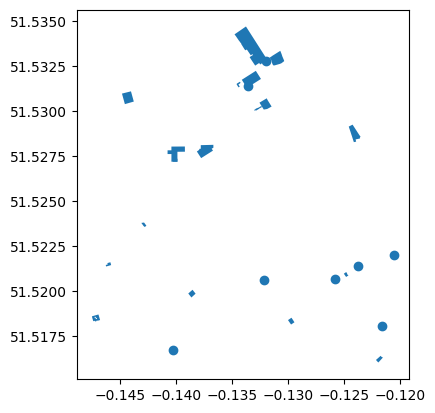

In [45]:
import geopandas as gpd
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="ucfnhua@ucl.ac.uk") # Nominatim asks that the user_agent contains your email address

# Get the location
location = geolocator.geocode('University College London')

# Get the geographical data
gdf = ox.features_from_point((location.latitude, location.longitude), tags={"amenity": "school"})

# Print the shape of the GeoDataFrame
print(gdf.shape)
print(gdf)

# Visualize the GeoDataFrame
gdf.plot()

plt.show()


In [ ]:
cs = '[out:json][timeout:180][date:"2019-10-28T19:20:00Z"]'
gdf = ox.pois_from_address( '22 Gordon St, London WC1H 0QB', tags={"amenity": "school"}, custom_settings=cs)

AttributeError: module 'osmnx' has no attribute 'pois_from_address'

This calculates and visualises the fastest routes between different pairs of points in the road network of Westminster.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

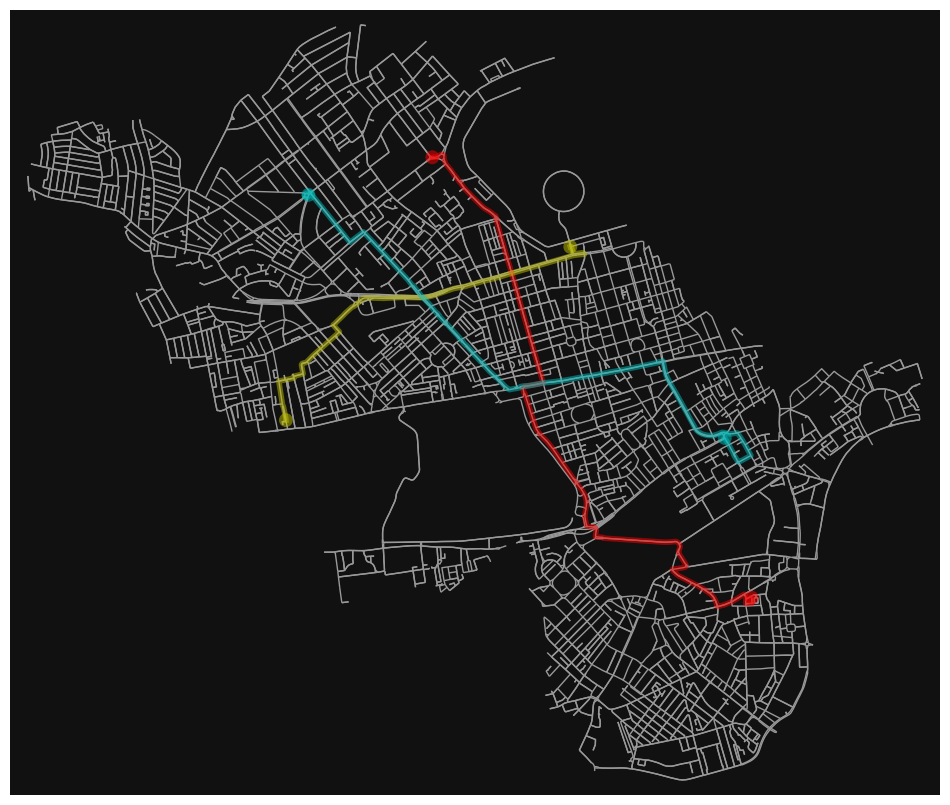

In [ ]:
# get a graph
G = ox.graph_from_place('Westminster', network_type='drive')

# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths minimising travel time
wt = 'travel_time'
route1 = nx.shortest_path(G, list(G)[10], list(G)[-10], weight=wt)
route2 = nx.shortest_path(G, list(G)[0], list(G)[-1], weight=wt)
route3 = nx.shortest_path(G, list(G)[-100], list(G)[100], weight=wt)

# plot the 3 routes
routes = [route1, route2, route3]
colors = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=colors, node_size=0, figsize=(12, 12), dpi=150)


## Points of Interest (POIs)

### Amenity

<ipython-input-51-9e52fa155fc6>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=2000, tags=tags) # dist default value=1000
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs 

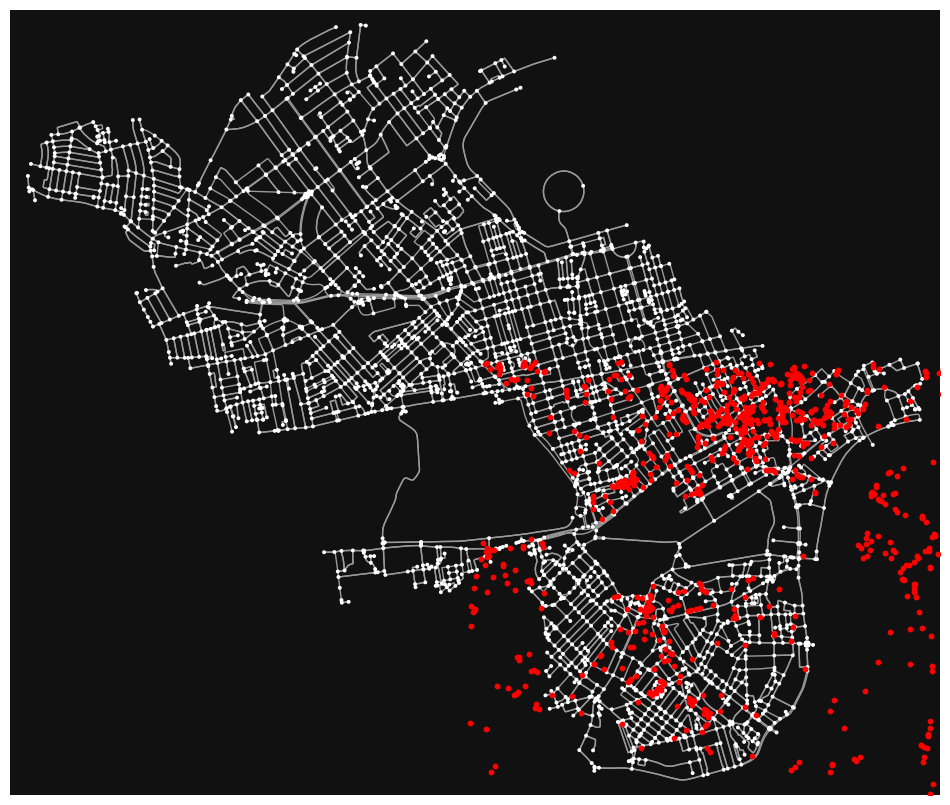

In [51]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Set query tags
tags = {'amenity': ['restaurant', 'pub', 'hotel'], 'building': 'hotel', 'tourism': 'hotel'}

# Get points of interest information
gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=2000, tags=tags) # dist default value=1000

# Filter out point geometry objects
gdf_points = gdf[gdf.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('City of Westminster, London, UK', network_type='drive')

# Plot network graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, node_size=8, show=False, close=False)

# Mark points of interest on the map with red dots
ax.scatter(gdf_points.geometry.x, gdf_points.geometry.y, c='red', s=10)

plt.show()


### Food

<ipython-input-46-37666f8e39e2>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=2000, tags=tags) # dist default value=1000
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs 

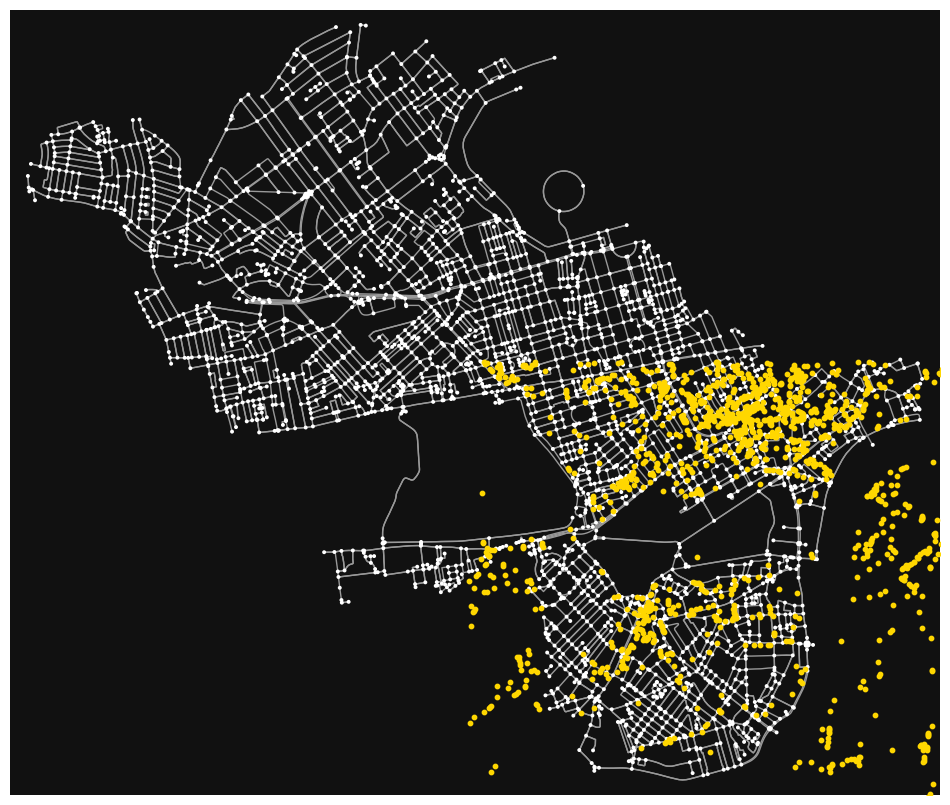

In [46]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Set query tags
tags = {'amenity': ['restaurant', 'cafe', 'bar', 'fast_food', 'bakery', 'supermarket']}

# Get points of interest information
gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=2000, tags=tags) # dist default value=1000

# Filter out point geometry objects
gdf_points = gdf[gdf.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('City of Westminster, London, UK', network_type='drive')

# Plot network graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, node_size=8, show=False, close=False)

# Mark points of interest on the map with red dots
ax.scatter(gdf_points.geometry.x, gdf_points.geometry.y, c='gold', s=10)

plt.show()


### Parks

<ipython-input-52-c72a19607cb3>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=5000, tags=tags)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (De

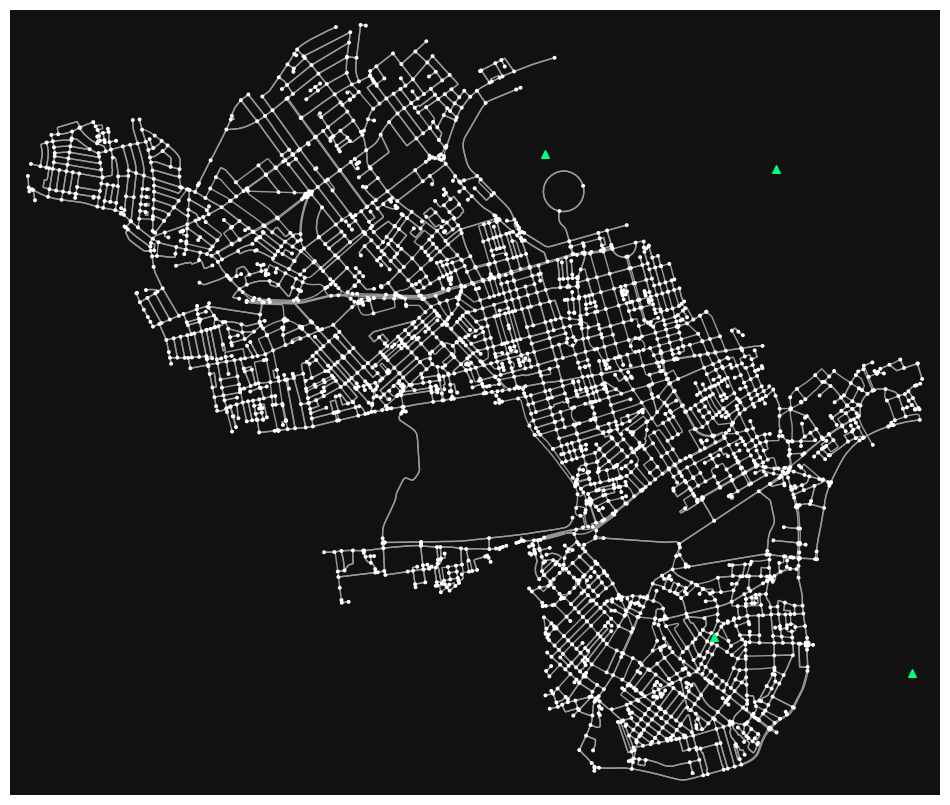

In [52]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Set query tags
tags = {'leisure': 'park'}

# Get points of interest information
gdf = ox.geometries_from_point(center_point=(51.4973, -0.1357), dist=5000, tags=tags)

# Filter out point geometry objects
gdf_points = gdf[gdf.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('City of Westminster, London, UK', network_type='drive')

# Plot network graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, node_size=8, show=False, close=False)

# Mark points of interest on the map with green dots
ax.scatter(gdf_points.geometry.x, gdf_points.geometry.y, c='springgreen', s=30, marker='^')

plt.show()


<ipython-input-53-e7e4f03c8874>:13: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  parks = ox.geometries_from_place('City of Westminster, London, UK', tags=tags)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecat

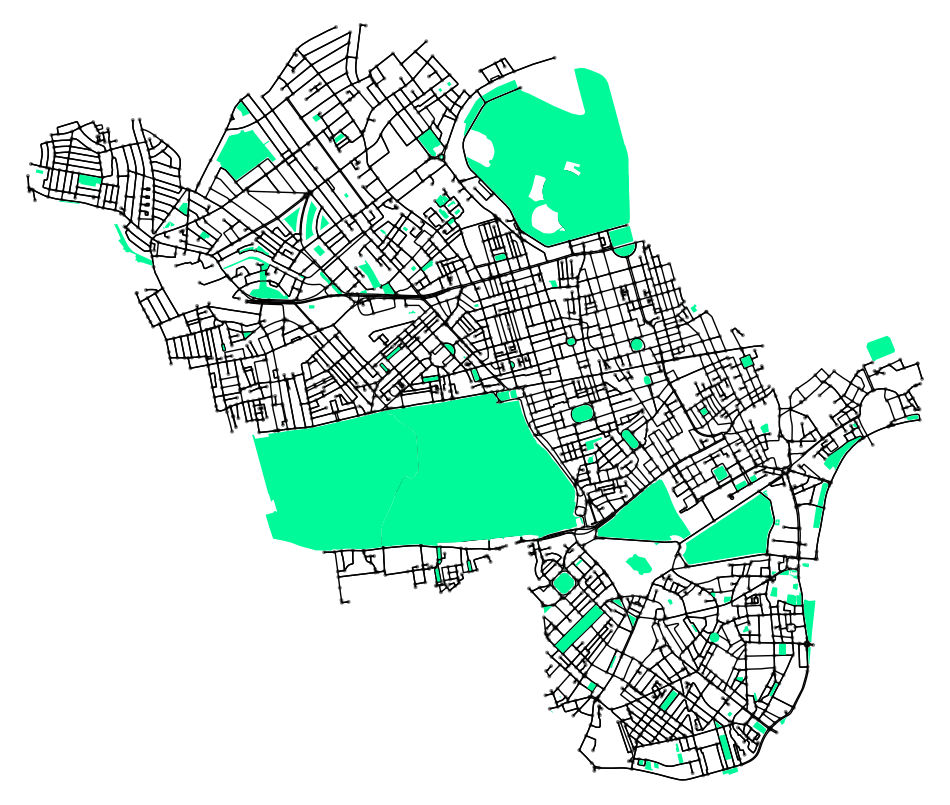

In [53]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from scipy.spatial import cKDTree
import numpy as np
import matplotlib.cm as cm

# Set query tags
tags = {'leisure': 'park'}

# Get park information
parks = ox.geometries_from_place('City of Westminster, London, UK', tags=tags)

# Filter out point geometry objects
parks_points = parks[parks.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('City of Westminster, London, UK', network_type='drive')

# Plot network graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, show=False, close=False, edge_color='black', node_color='black', bgcolor='white', node_size=8, node_alpha=0.5)

# Plot parks
parks.plot(ax=ax, color='mediumspringgreen')

plt.show()


<ipython-input-54-03839569c69a>:13: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  parks = ox.geometries_from_place('City of Westminster, London, UK', tags=tags)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecat

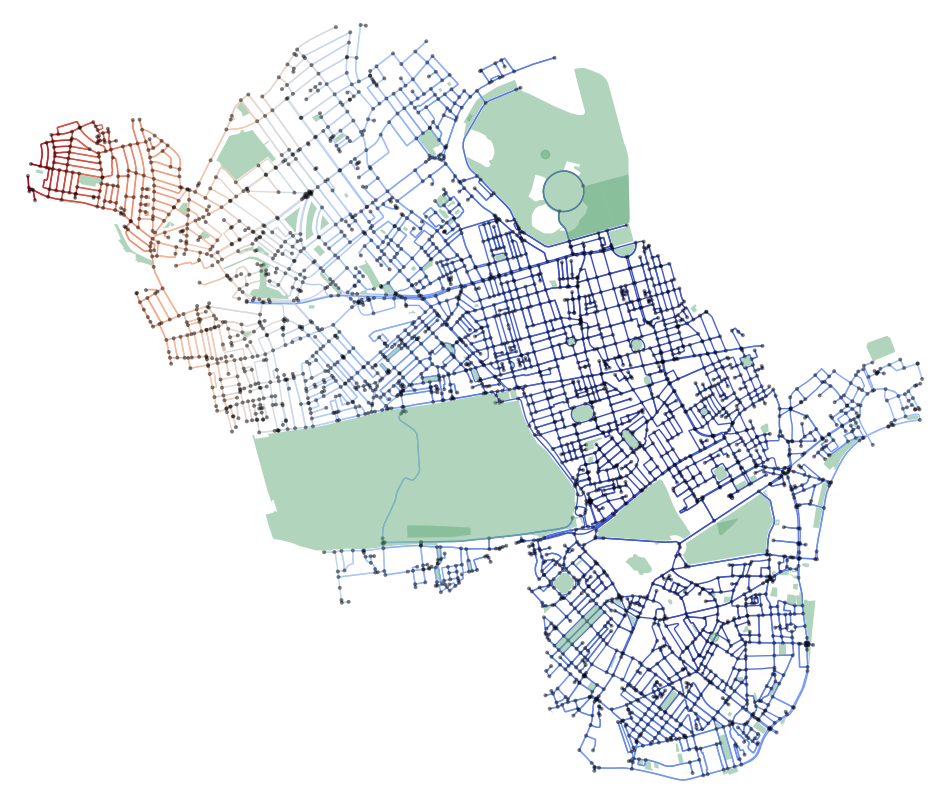

In [54]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from scipy.spatial import cKDTree
import numpy as np
import matplotlib.cm as cm

# Set query tags
tags = {'leisure': 'park'}

# Get park information
parks = ox.geometries_from_place('City of Westminster, London, UK', tags=tags)

# Filter out point geometry objects
parks_points = parks[parks.geometry.type == 'Point']

# Create driving network graph
G = ox.graph_from_place('City of Westminster, London, UK', network_type='drive')

# Get the centroids of the roads
road_centroids = gpd.GeoSeries([line.centroid for line in ox.graph_to_gdfs(G, edges=False, nodes=True).geometry])

# Create a k-d tree for quick park lookup
tree = cKDTree(np.array([parks_points.geometry.x, parks_points.geometry.y]).T)

# Create a list to store average distances
average_distances = []

# Iterate through the centroids of each road
for road_centroid in road_centroids:
    # Calculate the distance from the current road centroid to all parks
    distances, _ = tree.query(np.array([road_centroid.x, road_centroid.y]).reshape(1, -1), k=len(parks_points))

    # Calculate the average distance and add it to the list
    average_distances.append(np.mean(distances))

# Normalize the average distances between 0 and 1
normalized_average_distances = (average_distances - np.min(average_distances)) / (np.max(average_distances) - np.min(average_distances))

# Create a new attribute in the graph for each node representing the average distance to the nearest park
for idx, (n, d) in enumerate(G.nodes(data=True)):
    d['avg_dist_to_park'] = normalized_average_distances[idx]

# Create a colour map
cmap = cm.get_cmap('coolwarm')

# Colour the roads using the new attribute
ec = [cmap(G.nodes[u]['avg_dist_to_park']) for u, v, k in G.edges(keys=True)]

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, show=False, close=False, edge_color=ec, node_color='black', bgcolor='white', node_size=8, node_alpha=0.5)

# Plot the parks
parks.plot(ax=ax, color='#65ab7c', alpha=0.5)

plt.show()


Euclidean distance from the geometric centre of the road to the park

\begin{equation}
d_{i,j} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
\end{equation}

The average distance from the geometric centre of each road to all parks

\begin{equation}
\bar{d}_i = \frac{1}{N}\sum_{j=1}^{N} d_{i,j}
\end{equation}

Normalise these average distances to be between 0 and 1

\begin{equation}
\bar{d}_{i, norm} = \frac{\bar{d}_i - \min(\bar{d})}{\max(\bar{d}) - \min(\bar{d})}
\end{equation}

<ipython-input-75-a7cafca37830>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tree = cKDTree(np.array([parks_polygons.geometry.centroid.x, parks_polygons.geometry.centroid.y]).T)
<ipython-input-75-a7cafca37830>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


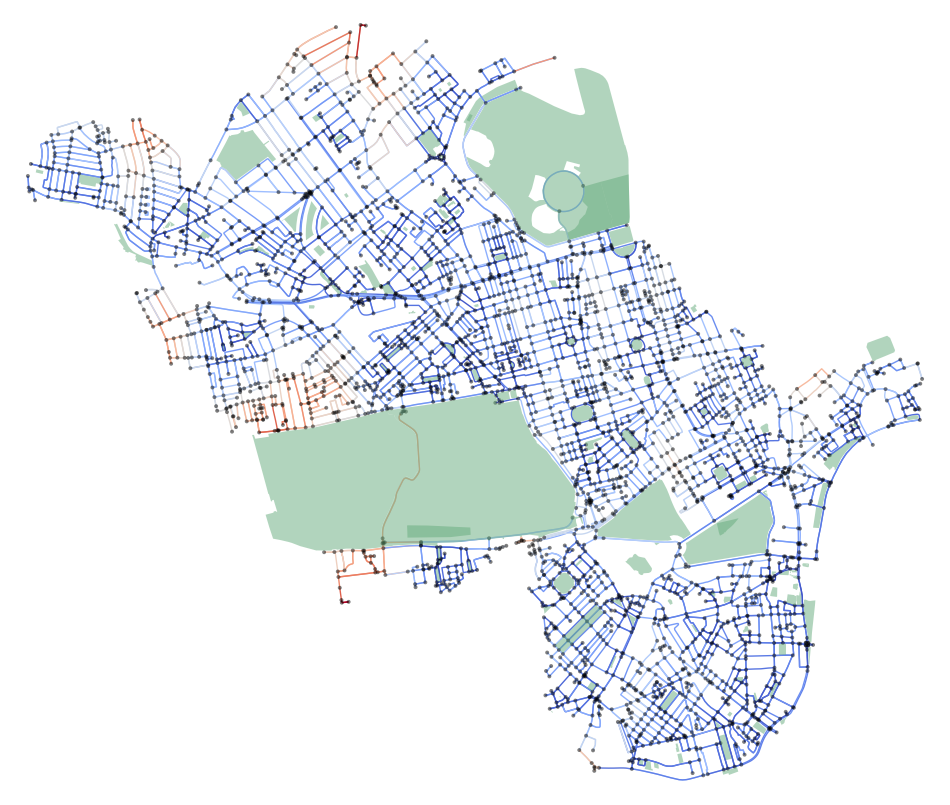

In [ ]:
# Filter out polygon geometric objects
parks_polygons = parks[parks.geometry.type == 'Polygon']

# Create a k-d tree for quick query of the nearest park
tree = cKDTree(np.array([parks_polygons.geometry.centroid.x, parks_polygons.geometry.centroid.y]).T)

# Create a list to store average distances
average_distances = []

# Traverse each node
for n, d in G.nodes(data=True):
    # Calculate the distance from the current node to the nearest park
    distances, _ = tree.query(np.array([d['x'], d['y']]).reshape(1, -1))

    # Add the distance to the list
    average_distances.append(distances[0])

# Normalise the average distance between 0 and 1
normalized_average_distances = (average_distances - np.min(average_distances)) / (np.max(average_distances) - np.min(average_distances))

# Create a new attribute in the graph for each node, representing the average distance to the nearest park
for idx, (n, d) in enumerate(G.nodes(data=True)):
    d['avg_dist_to_park'] = normalized_average_distances[idx]

# Create a colour mapping
cmap = cm.get_cmap('coolwarm')

# Colour the roads using the new attribute
ec = [cmap(G.nodes[u]['avg_dist_to_park']) for u, v, k in G.edges(keys=True)]

# Draw the graph
fig, ax = ox.plot_graph(G, figsize=(12, 12), dpi=150, show=False, close=False, edge_color=ec, node_color='black', bgcolor='white', node_size=8, node_alpha=0.5)

# Draw the parks
parks_polygons.plot(ax=ax, colour='#65ab7c', alpha=0.5)

plt.show()
